# Nick Juliano
# Computational Physics | Homework 02

### Part 1

Write a program to plot
\begin{equation}
f(x)=\pi/2+2*(sin(x)+sin(3x)/3+sin(5x)/5+....sin(nx)/n)
\end{equation}
from -$\pi$ to $\pi$. Choose n=11, 21 and 31 and plot three curves in one figure. Please use numpy library and matplotlib.



### Solution

This function, if viewed in the form $f(x)=\frac{\pi}{2}+\sum_{n=odd}^{n}[\frac{2}{n}(sin(nx))]$, is a simple loop. 

In this case, our program will:

    1) accept a given n and x
    2) check n for "odd-ness" 
    3) create array of all positive odd values up to n
    4) solve for the function above with a loop of this array




In [1]:
import numpy as np
import matplotlib.pyplot as plt

def fn(n, x):                                # ---Verbose Explanation of this function:---
    if n%2 == 1:                             # continue only if n is odd
        function = np.pi/2                   # initialize f(x) using the pi/2 term
        n        = np.arange(1,n+1)          # create an interger array from 1 to n
        n        = n[n%2==1]                 # extract only the odd numbers
        for i in n:                          # for each value of n
            function += (2/i) * np.sin(i*x)  # compute the term and add it to existing f(x)
    else:                                    # if n is not odd
        raise ValueError("n must be odd")    # say that it should be and do nothing else
    return function                          # return the completed summation

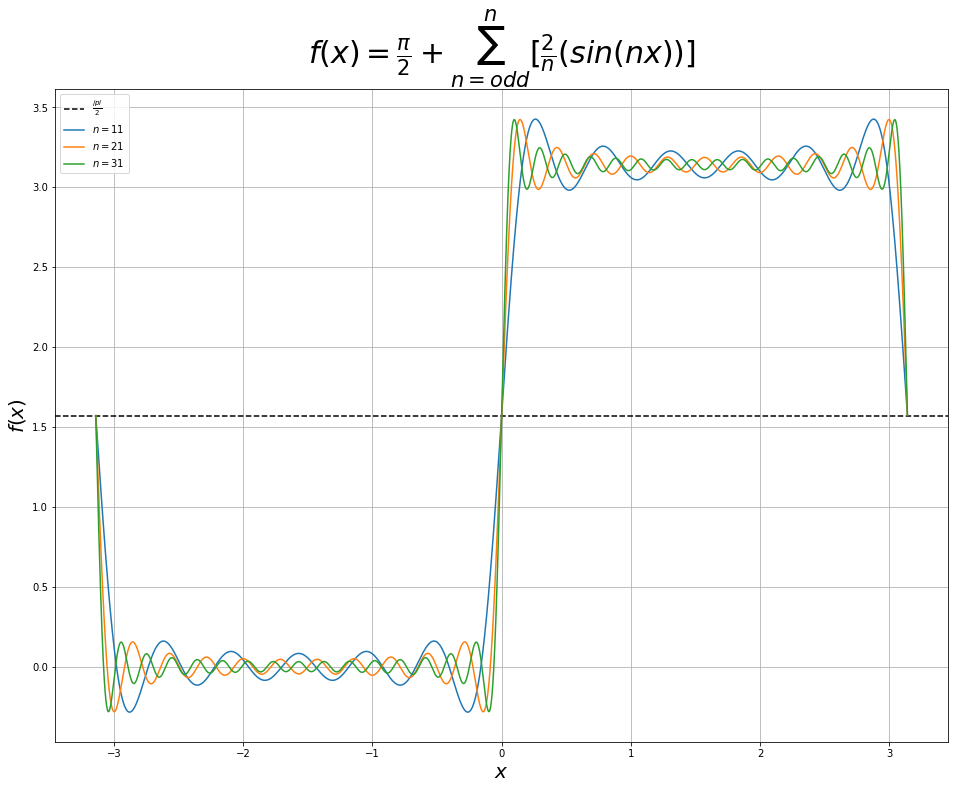

In [2]:
# set the domain of the function, plot with a fine resolution (0.001)
x    = np.arange(-np.pi, np.pi, 0.001)  

#create f(x) for each n
y_11 = fn(11, x)
y_21 = fn(21, x)
y_31 = fn(31, x)

#create plot
plt.figure(figsize=[16,12])

#label figure
plt.title(r'$f(x)=\frac{\pi}{2}+\sum_{n=odd}^{n}[\frac{2}{n}(sin(nx))]$', fontsize=30)
plt.xlabel(r'$x$', fontsize=20)
plt.ylabel(r'$f(x)$', fontsize=20)

#create gridlines
plt.grid()
plt.axhline(np.pi/2,linestyle='--', color='k', label=r'$\frac{/pi}{2}$')

#add each f(x) to the plot
plt.plot(x, y_11, label=r'$n=$'+str(11))
plt.plot(x, y_21, label=r'$n=$'+str(21))
plt.plot(x, y_31, label=r'$n=$'+str(31))

#label each f(x) and display the figure
plt.legend()
plt.show()

***

### Part 2

Make a 2-dimensional contour plot using matplotlib. Define any function, include a title, label the axes, and adjust the font size appropriately.

### Solution

Let's plot the force of gravity acting on a 1kg test particle due to the Earth and the Moon at any location on the orbital plane, with the Moon oriented to the "left" of the Earth on the x-axis.

<ipython-input-3-ac8c5e5e8fc1>:20: RuntimeWarning: divide by zero encountered in true_divide
  Fg_moon  = (G*M_moon*m_sat)/((d_moon(x, y))**2)   # Compute the Force of Gravity acting on the test particle by the Moon
<ipython-input-3-ac8c5e5e8fc1>:21: RuntimeWarning: divide by zero encountered in true_divide
  Fg_earth = (G*M_earth*m_sat)/((d_earth(x, y))**2) # Compute the Force of Gravity acting on the test particle by the Earth


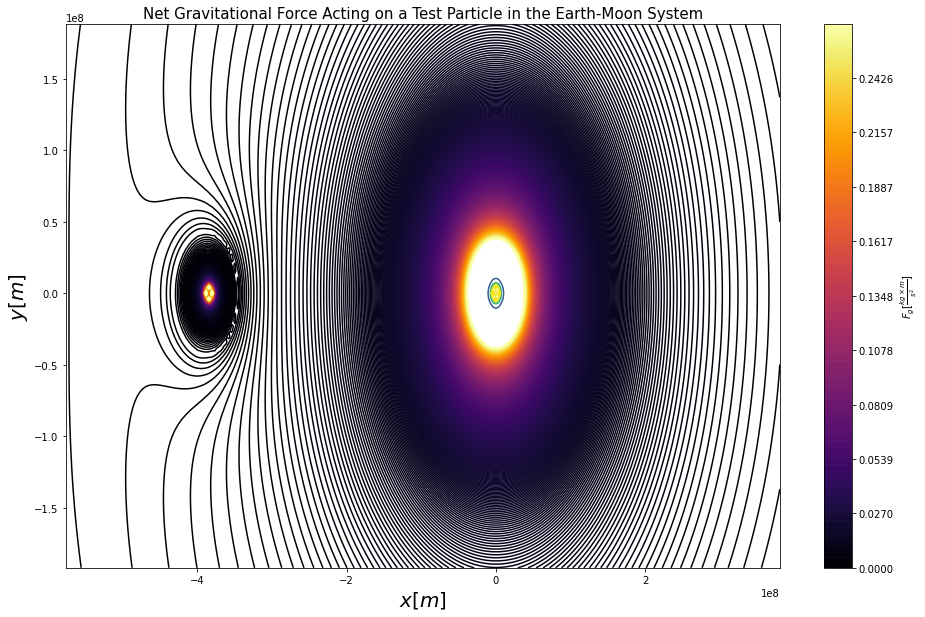

In [3]:
M_moon=7.342e22                                   # Moon's mass in kg  
M_earth=5.972e24                                  # Earth's mass in kg
m_sat=1                                           # Test particle's mass in kg
R=3.844e8                                         # Earth-Moon distance in meters
G=6.67e-11                                        # Gravitational Constant 


def d_moon(x, y):                                 # Determine the distance of the test particle from the Moon
    d=np.sqrt(((x+R)**2)+(y**2)) 
    return d

def d_earth(x, y):                                # Determine the distance of the test particle from the Earth
    d=np.sqrt(((x)**2)+(y**2))
    return d

x        = np.arange(-R*1.5, R, R/100)            # Establish the domain of the plotted x-axis
y        = np.arange(-R/2, R/2, R/100)            # Establish the domain of the plotted y-axis
x, y     = np.meshgrid(x, y)     

Fg_moon  = (G*M_moon*m_sat)/((d_moon(x, y))**2)   # Compute the Force of Gravity acting on the test particle by the Moon
Fg_earth = (G*M_earth*m_sat)/((d_earth(x, y))**2) # Compute the Force of Gravity acting on the test particle by the Earth
         
z        = Fg_earth-Fg_moon                       # Compute the Net Force of Gravity acting on the test particle
Nans     = np.isinf(z)
z[Nans]  = 0
z        = np.abs(z)

levels = np.arange(z.min(), 0.01*z.max(), (0.01*z.max() - z.min())/1000)

#create plot
plt.figure(figsize=[16,10])

#label figure
plt.title('Net Gravitational Force Acting on a Test Particle in the Earth-Moon System', fontsize=15)
plt.xlabel(r'$x[m]$', fontsize=20)
plt.ylabel(r'$y[m]$', fontsize=20)
                 
plt.contour(x, y, z, vmin=0.01*z.max(), vmax=0.5*z.max())
plt.colorbar(plt.contour(x, y, z, levels=levels, cmap='inferno'), label=r'$F_g [\frac{kg\times m}{s^2}]$')
plt.show()